In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Turn in an image (e.g., screenshot) or PDF copy of any code that is part of your answer. Make sure all images and PDF pages are properly rotated. Make sure that all pages are clearly visible. 

Tips: Use the document scanner function on your smart phone to take better page "scans" using your camera. Make sure your screen is not shifted toward warmer colours (some devices filter blue light at night) giving it a dim and orange appearance. 

# Question 1
The Lagrange interpolating polynomial is
$$ p(x) = \sum_{j=0}^{n}y_j L_j(x).$$
Show that the identity ,
$$ \sum_{j=0}^{n} L_j(x) = 1,$$
is true for all $x$.

**Hint: The answer requires no algebra. Use the fact that $f(x) = 1$ is a polynomial of degree zero and a Lagrange polynomial.**

------------------------------------------------------------------



# Question 2

## A. 
Write a function for computing the barycentric weights 
$$w_j = \left[\prod_{\substack{i=0 \\\\ i\neq j}}^{n}(x_j - x_i)\right]^{-1}.$$
Your function should take as input a vector containing the nodes $x_j$ and output the weights $w_j$ . Call your function `baryfit`. Write another function for evaluating the barycentric interpolant 
$p(x).$ 
This function should take as input a vector containing the nodes $x_j$, a vector containing the corresponding barycentric weights $w_j$ (generated from your `baryfit` function), a vector containing the corresponding function values $y_j = f(x_j)$, and the location (or a vector of locations) of where the interpolant should be evaluated. The output of the function should be the value of the interpolating polynomial at all the evaluation points. Call this function `baryeval`.

------------------------------------------------------------------

## B. 
Using your `baryfit` function from part a, generate the barycentric weights for the following two sets of nodes:
  1. $x_j = -1 + \frac{2j}{8}$, $j=0,1,\ldots, 8$
  2. $x_j = -\cos(\frac{j\pi}{8})$, $j=0,1,\ldots, 8$

Plot the values of the weights versus the corresponding values of the nodes (i.e plot ($x_j$ , $w_j$ )) for each of the node sets. Comment on the results.

------------------------------------------------------------------

## C. 
For the two node sets from part B, use your `baryeval` function to evaluate the 8th degree polynomial interpolant of the function $f(x) = \vert x \vert$ at 101 equally spaced points between $[-1, 1]$. Plot the error ($p(x) − \vert x \vert$) in the polynomial interpolant at these evaluation points for each of the two node sets. Which node set seems to produce the best result? What criteria did you use to determine what ‘best’ means?

------------------------------------------------------------------

## D. 
For certain sets of nodes $x_j$, it is possible to give explicit formulas for the barycentric weights $w_j$. The easiest case is when the nodes are equally spaced between $[−1,1]$, (i.e., $x_j =−1+\frac{2j}{n}$, $j=0,1,...,n$). Show that for these nodes
$$w_j = \frac{\left(\frac{n}{2}\right)^n(-1)^{n-j}}{n!}\binom{n}{j}$$
Note that since $w_j$ appear both in the numerator and denominator of the barycentric formula for $p(x)$, any factors common to all $w_j$ can be factored out. Thus, we can reduce the above expression for the barycentric weights to $w_j =(−1)^j\binom{n}{j}$.

------------------------------------------------------------------

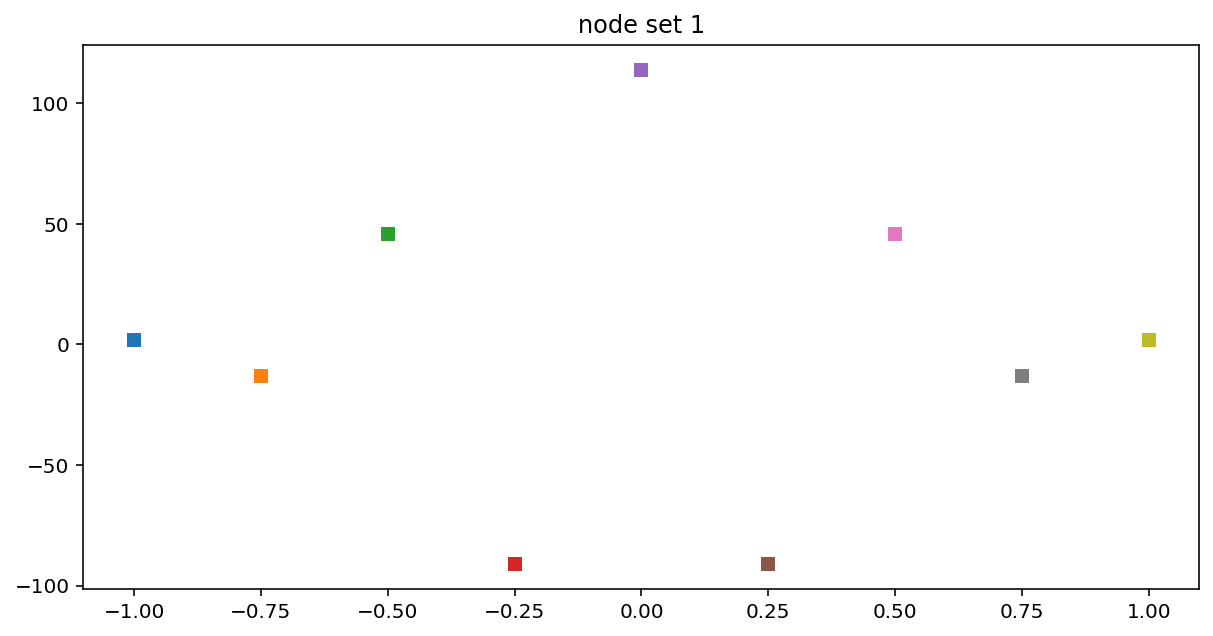

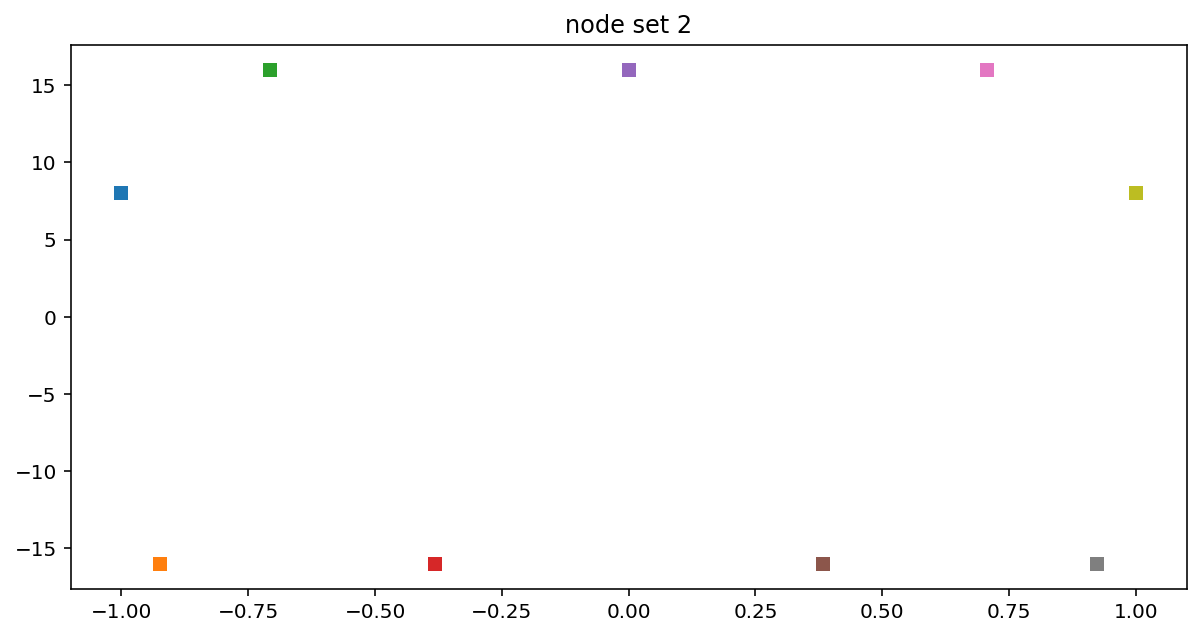

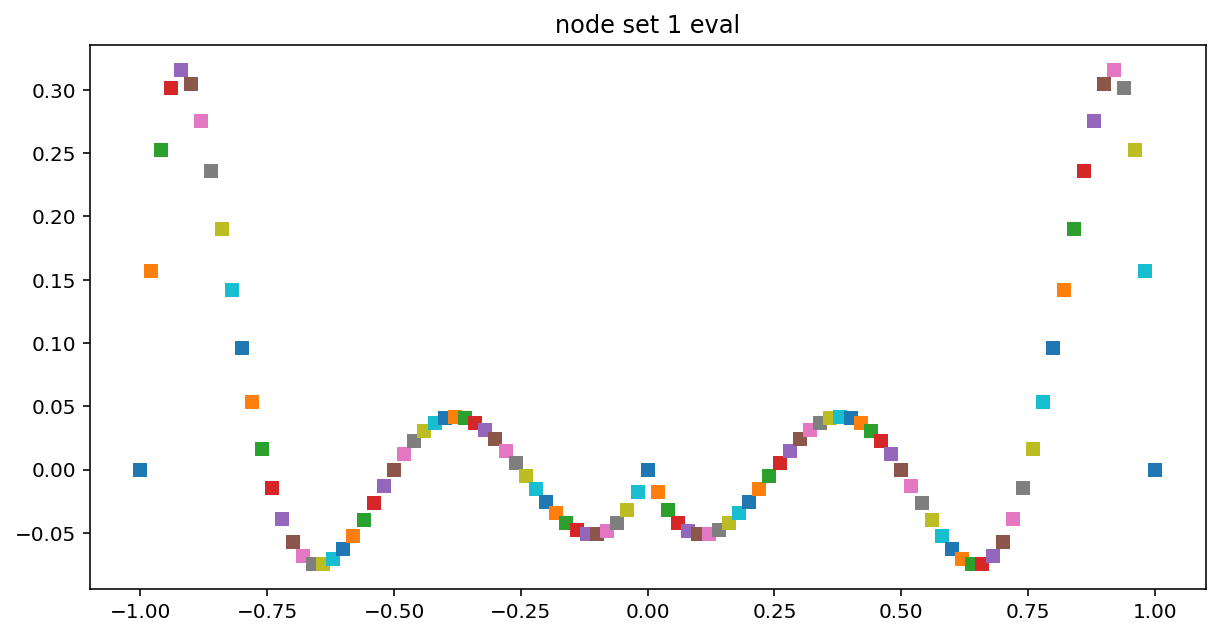

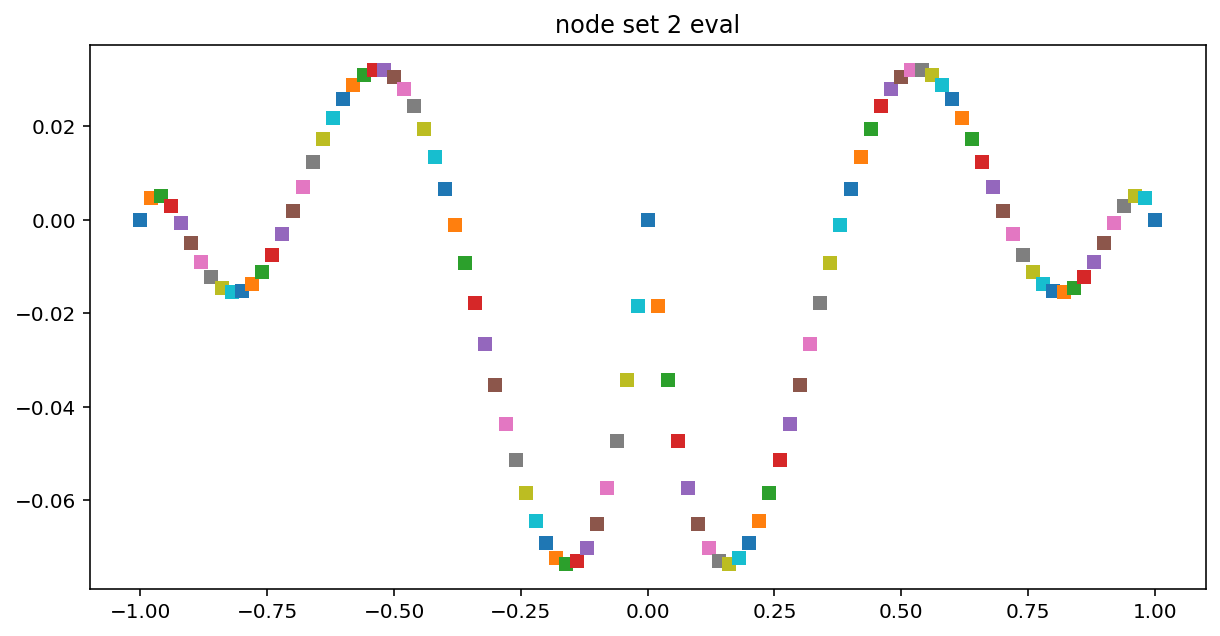

In [101]:
#Q_A
def baryfit(x):
    weights=np.array(len(x)*[1.0])
    for j in range(0,len(x)):
        for i in range(0,len(x)):
            if j!=i:
                weights[j]*=x[j]-x[i]
        weights[j]=1.0/weights[j]
    return weights
        

    
def baryeval(x,y,w,evaluate):
    output=np.array(len(evaluate)*[0.0])
    for e_index,e in enumerate(evaluate):
        if e in x:
            output[e_index]= y[np.where(x==e)[0][0]]
            continue
        x_minus_x_j=e-x
        output[e_index]=(y*w/x_minus_x_j).sum()/(w/x_minus_x_j).sum()
    return output

#Q_B_1
xj_list1=[]
for j in range(0,9):
    xj=-1+j/4
    xj_list1.append(xj)#node1 x vector
wj1=baryfit(xj_list1)#node1 w vector
figure(1, [10, 5])

title('node set 1');
for i in range(0,9):
    plot(xj_list1[i],wj1[i],"s")
    i+=1
#Q_B_2
xj_list2=[]
for j in range(0,9):
    xj=-cos(j*pi/8)
    xj_list2.append(xj)#node2 x vector
wj2=baryfit(xj_list2)#node2 w vector
figure(2, [10, 5])
title('node set 2');
for i in range(0,9):
    plot(xj_list2[i],wj2[i],"s")
    i+=1
    
    
    
#Q_C_1   
def f(x):
    return abs(x)
figure(3, [10, 5])
title('node set 1 eval');
x=linspace(-1.,1.,101)#node x vector
yj_list1=[]
for i in range(0,9):
    yj_list1.append(f(xj_list1[i]))#node y vector
output1=baryeval(xj_list1,yj_list1,wj1,x)#node1 eval 
for i in range(len(output1+1)):
    plot(x[i],output1[i]-abs(x[i]),'-s')

#Q_C_2   
yj_list2=[]
figure(4, [10, 5])
title('node set 2 eval');
for i in range(0,9):
    yj_list2.append(f(xj_list2[i]))
output2=baryeval(xj_list2,yj_list2,wj2,x)#node2 eval 
for i in range(len(output2+1)):
    plot(x[i],output2[i]-abs(x[i]),'-s')

# Question 3
Suppose you are given the following experimental measurements:
\begin{align}
	x_i &\qquad f(x_i) \\\\
	0.08 &\qquad 0.6739 \\\\
	0.46 &\qquad 2.4306 \\\\
	1.00 &\qquad 0.0000 \\\\
	1.51 &\qquad -1.0621 \\\\
	2.05 &\qquad 0.0986
\end{align}

## A. 
Write a python script (using the code from Q2) that approximates $f(0.75)$ using the following Lagrange polynomials:
\begin{align}
	&\text{$P_1$ using $x_0 = 0.46$, and $x_1 = 1.00$;} \\\\
	&\text{$P_2$ using $x_0 = 0.46$, $x_1 = 1.00$, and $x_2 = 1.51$;} \\\\
	&\text{$P_3$ using $x_0 = 0.08$, $x_1 = 0.46$, $x_2 = 1.00$, and $x_3 = 1.51$;} \\\\
	&\text{$P_4$} \text{ using all five points}.
\end{align}

------------------------------------------------------------------

## B. 
The information in the above table corresponds to the function
\begin{equation} 
f(x) = \sin(\pi x)e^{\cos(x)}. 
\end{equation}

What is the absolute error of each of your approximations $P_i(0.75)$? Which Lagrange polynomial was the most accurate? Is this the result you expected?

------------------------------------------------------------------

In [114]:
def baryfit(x):
    weights=np.array(len(x)*[1.0])
    for j in range(0,len(x)):
        for i in range(0,len(x)):
            if j!=i:
                weights[j]*=x[j]-x[i]
        weights[j]=1.0/weights[j]
    return weights
        

    
def baryeval(x,y,w,evaluate):
    output=np.array(len(evaluate)*[0.0])
    for e_index,e in enumerate(evaluate):
        if e in x:
            output[e_index]= y[np.where(x==e)[0][0]]
            continue
        x_minus_x_j=e-x
        output[e_index]=(y*w/x_minus_x_j).sum()/(w/x_minus_x_j).sum()
    return output

x1=[0.46,1.00]
x2=[0.46,1.00,1.51]
x3=[0.08,0.46,1.00,1.51]
x4=[0.08,0.46,1.00,1.51,2.05]
y1=[2.4306,0.0000]
y2=[2.4306,0.0000,-1.0621]
y3=[0.6739,2.4306,0.0000,-1.0621]
y4=[0.6739,2.4306,0.0000,-1.0621,0.0986]
x=linspace(0.75 ,1.,2)
output1=baryeval(x1,y1,baryfit(x1),x)
print(output1[0])
output2=baryeval(x2,y2,baryfit(x2),x)
print(output2[0])
output3=baryeval(x3,y3,baryfit(x3),x)
print(output3[0])
output4=baryeval(x4,y4,baryfit(x4),x)
print(output4[0])

1.1252777777777778
0.9582818238406473
1.4291668141226963
1.2893732885452804


In [118]:
def g(x):
    return sin(pi*x)*e**cos(x)
accvalu=g(0.75)
print(abs(accvalu-output1[0]))
print(abs(accvalu-output2[0]))
print(abs(accvalu-output3[0]))
print(abs(accvalu-output4[0]))

0.3445059685011822
0.5115019224383127
0.04061693215626372
0.18041045773367959
